In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib

## 1. Поиск средней и медианой прибыли 
### 1.1 Прогнозирование возможного спроса

In [23]:
std_n = 500
mean_n = 2500

"""
Так как среднее значение и стандартное отклонение дано для нормального распределения, 
надо найти те же посчитать те же значения для логонормального распределния
""" 


std_log = np.sqrt(np.log((std_n ** 2) /(mean_n ** 2) + 1))
mean_log = np.log(mean_n) - (std_log ** 2) / 2
    
demand = np.random.lognormal(mean_log, std_log, size=100000)
demand = np.round(demand) # округляем значение, так как спрос на упаковку печенья дискретен(мы не можем продавать нецелую пачку)


cookies_demand = lognorm_distrub(mean_n, std_n, 100000)

### 1.2 Графическое представление потенциальных прибылей

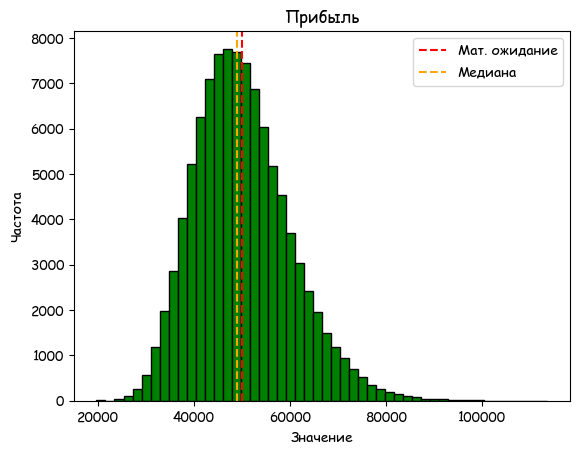

'Средняя величина прибыли: 50016.7208 д.е.'

'Медиана величина прибыли: 49080.0 д.е'

In [3]:
matplotlib.rcParams['font.family'] = 'Comic Sans MS'

cookies_profits = cookies_demand * (50 - 30)

def profits_plt(profits): 
    mean_pr = np.mean(profits)
    median_pr = np.percentile(profits, 50)
    
    plt.hist(profits, bins=50, color='green', edgecolor='black')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.title('Прибыль')

    plt.axvline(mean_pr, color='r', linestyle='--', label='Мат. ожидание')
    plt.axvline(median_pr, color='orange', linestyle='--', label='Медиана')


    plt.legend()
    plt.show()
    return 
    
profits_plt(cookies_profits)

display('Средняя величина прибыли: ' + str(np.mean(cookies_profits)) + ' д.е.', 
        'Медиана величина прибыли: ' + str(np.percentile(cookies_profits, 50)) + ' д.е')

## 2.1 Поиск оптимального выпуска
Оптимальный выпуск - это выпуск, при котором мы будем получать наибольшую прибыль. Так как, производя печенье, мы не знаем, какой будет спрос, то оптимальным решением будет, тот выпуск, при котором прибыль будет независимо от спроса в среднем выше, чем при другом выпуске. При таком выпуске в долгосрочной перспективе наша прибыль будет маскимальна.

In [35]:

potential_production = np.arange(mean_n - 3 * std_n, mean_n + 3 * std_n, 1) #Рассмотрим наиболее возможные
potential_revenue = np.zeros((potential_production.shape[0], 10000))


for i in range(len(potential_production)):
    demand = np.random.lognormal(mean_log, std_log, size=10000)
    potential_revenue[i, :] = np.where(potential_production[i] <= demand,  potential_production[i] * 20, 
    (potential_production[i] - demand) * 15 + demand * 50 - potential_production[i] * 30)
mean_revenues = np.mean(potential_revenue, axis=1)
median_revenues = np.percentile(potential_revenue, q=50, axis=1)

print(mean_revenues, median_revenues)

[20000.         20020.         20040.         ... 27676.90007971
 27353.00064336 27228.43821221] [20000.         20020.         20040.         ... 25912.40652377
 25792.77255834 25826.59804038]


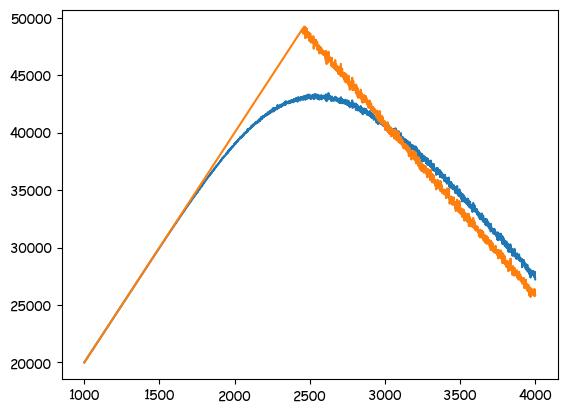

In [36]:
plt.plot(potential_production, mean_revenues)
plt.plot(potential_production, median_revenues)
plt.show()

Заметим, что оптимальный выпуск при стандартном отклонии 500 выше среднего спроса на печенье.

### 2.2 График потенциальных выпусков и их средних прибылей
График потенциальных представляет собой перевенутую параболу. Это демонстрирует, что при выбранным нами оптимальном выпуске средняя прибыль максимально и при других выпусках, не вошедших в рассматриваемый интервал, прибыль не будет выше 

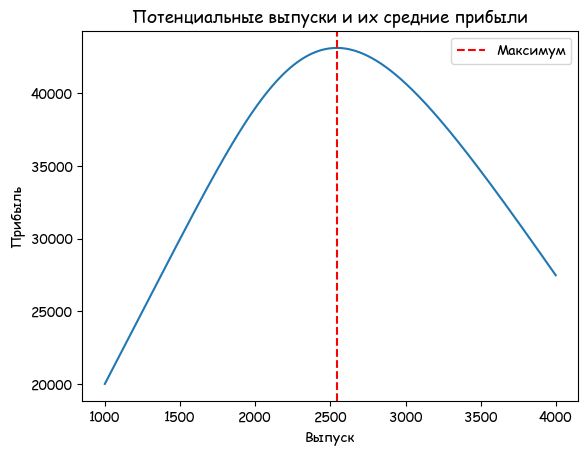

In [6]:
def rev_plot(potential_production, revenues):
    plt.plot(potential_production, revenues)
    plt.xlabel('Выпуск')
    plt.ylabel('Прибыль')
    plt.title('Потенциальные выпуски и их средние прибыли')

    plt.axvline(best_production,color='r', linestyle='--', label='Максимум')
    plt.legend()
    plt.show()

rev_plot(potential_production, cookies_mean_revenues)

## 3.1 Потенциальные убытки при недостатке и избытка выпуска

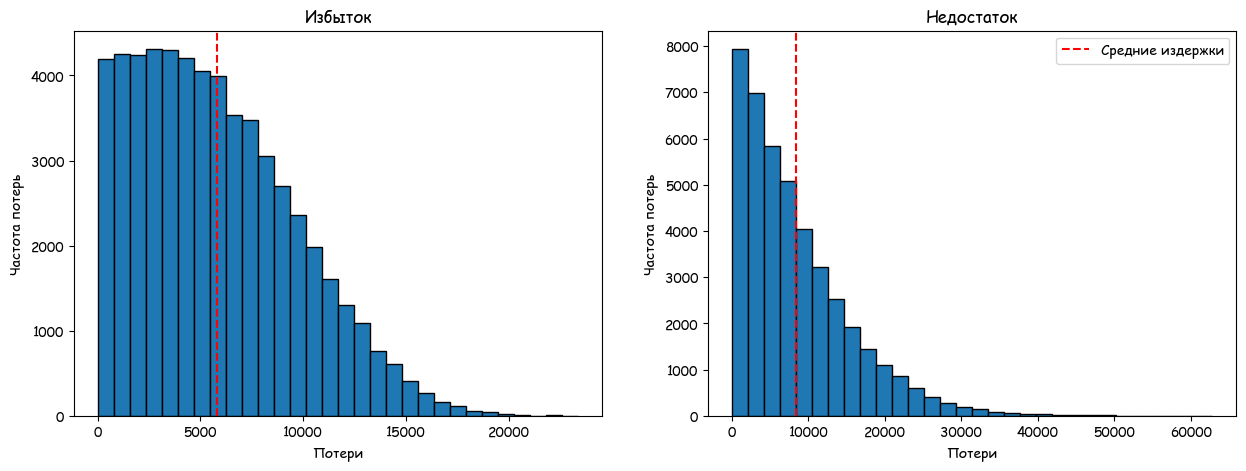

'Средние потери при избытке: 5797.08 д.е'

'Средние потери при недостатке: 8341.54 д.е'

'Общие средние потери: 6887.23 д.е'

In [7]:

costs_of_excess = (best_production - cookies_demand[cookies_demand < best_production])  * 15
costs_of_lack = (cookies_demand[cookies_demand > best_production] - best_production) * 20

def costs_plot(excess, lack):
    fig, plots_costs = plt.subplots(1,2, figsize=(15,5))

    plots_costs[0].hist(costs_of_excess, 30, edgecolor='black')
    plots_costs[0].set_xlabel('Потери')
    plots_costs[0].set_ylabel('Частота потерь')
    plots_costs[0].set_title('Избыток')

    mean_excess = np.mean(costs_of_excess)
    plots_costs[0].axvline(mean_excess, color='r', linestyle='--', label='Средние издержки')


    plots_costs[1].hist(costs_of_lack, 30, edgecolor='black')
    plots_costs[1].set_xlabel('Потери')
    plots_costs[1].set_ylabel('Частота потерь')
    plots_costs[1].set_title('Недостаток')

    mean_lack = np.mean(costs_of_lack)
    plots_costs[1].axvline(mean_lack,color='r', linestyle='--', label='Средние издержки')

    plt.legend()
    plt.show()

costs_plot(costs_of_excess, costs_of_lack)

costs_of_all_cases = np.concatenate((costs_of_excess, costs_of_lack))
mean_all = np.mean(costs_of_all_cases)

display('Средние потери при избытке: ' + str(np.round(np.mean(costs_of_excess), 2)) + ' д.е', 
        'Средние потери при недостатке: ' + str(np.round(np.mean(costs_of_lack), 2)) + ' д.е', 
        'Общие средние потери: ' + str(np.round(mean_all, 2)) + ' д.е')

## Измениния при стандартном отклонении 1000


In [8]:
std_n_new = 1000
cookies_demand_new = lognorm_distrub(mean_n, std_n_new, 100000)

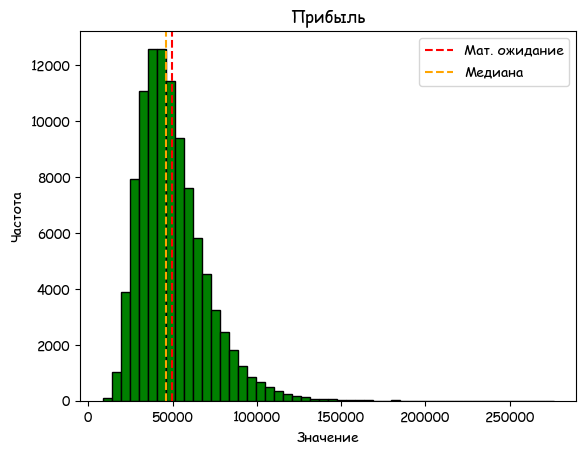

'Средняя величина прибыли: 49918.8726 д.е.'

'Медиана величина прибыли: 46400.0 д.е'

In [9]:
cookies_profits_new = cookies_demand_new * 20
profits_plt(cookies_profits_new)
display('Средняя величина прибыли: ' + str(np.mean(cookies_profits_new)) + ' д.е.', 
        'Медиана величина прибыли: ' + str(np.percentile(cookies_profits_new, 50)) + ' д.е')

In [10]:
potential_production_new = np.arange(0 , mean_n + 3 * std_n_new, 1) # начальное значение ноль, так как выпуск не может быть ниже 0
cookies_mean_revenues_new = forecasting_revenues(potential_production_new, cookies_demand_new)

In [11]:
best_production_new = potential_production_new[np.argmax(cookies_mean_revenues_new)]
best_production_in_cookies_new = best_production_new * 10
display('Доход при оптимальном заказе: ' + str(np.round(cookies_mean_revenues_new.max(), 2)) + ' д.е.', 
        'Оптимальный заказ производства печенья: ' + str(best_production_in_cookies_new) + ' шт. печенья',
        'Количество упаковок при оптимальном заказе: ' + str(best_production_new) + ' шт. упаковок')

'Доход при оптимальном заказе: 36603.81 д.е.'

'Оптимальный заказ производства печенья: 24810 шт. печенья'

'Количество упаковок при оптимальном заказе: 2481 шт. упаковок'

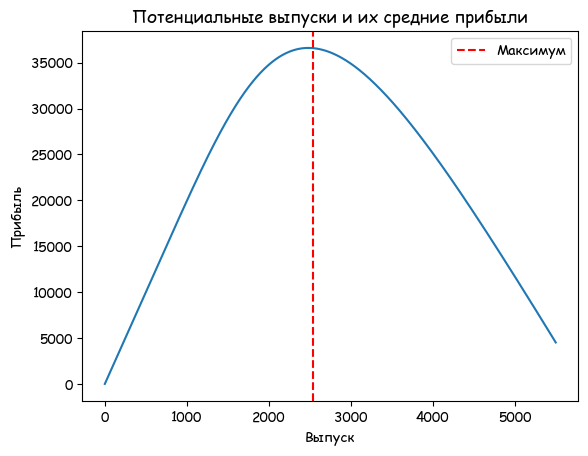

In [12]:
rev_plot(potential_production_new, cookies_mean_revenues_new)

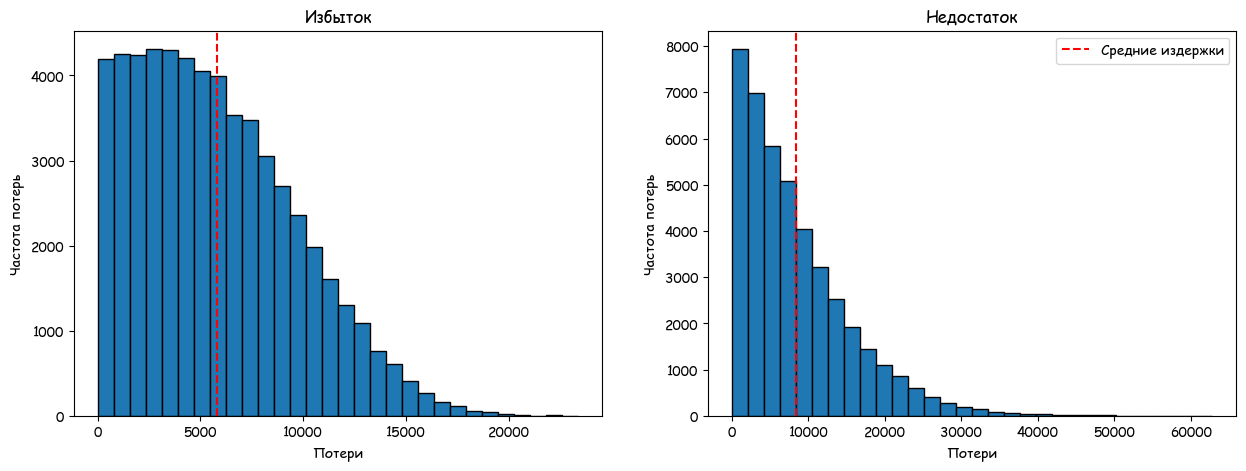

'Средние потери при избытке: 9764.17 д.е'

'Средние потери при недостатке: 18061.63 д.е'

'Общие средние потери: 13319.6 д.е'

In [13]:
# Потенциальные убытки при недостатке и избытка выпуска
costs_of_excess_new = (best_production_new - cookies_demand_new[cookies_demand_new < best_production_new])  * 15
costs_of_lack_new =  (cookies_demand_new[cookies_demand_new > best_production_new] - best_production_new) * 20

costs_plot(costs_of_excess_new, costs_of_lack_new)

costs_of_all_cases_new = np.concatenate((costs_of_excess_new, costs_of_lack_new))
mean_all_new = np.mean(costs_of_all_cases_new)

display('Средние потери при избытке: ' + str(np.round(np.mean(costs_of_excess_new), 2)) + ' д.е', 
        'Средние потери при недостатке: ' + str(np.round(np.mean(costs_of_lack_new), 2)) + ' д.е', 
        'Общие средние потери: ' + str(np.round(mean_all_new, 2)) + ' д.е')

In [14]:
print('На ' + str(np.percentile(cookies_profits, 50) - np.percentile(cookies_profits_new, 50)) + ' уменьшится медианная прибыль')
print('На ' + str(best_production_in_cookies - best_production_in_cookies_new) + ' шт. уменьшится оптимальный выпуск печенья')
print('На ' + str(np.round(cookies_mean_revenues.max() - cookies_mean_revenues_new.max(), 2)) + ' уменьшится средняя прибыль от оптимального выпуска')
print('На ' + str(np.round(np.mean(costs_of_excess_new) - np.mean(costs_of_excess), 2)) + ' увеличится средние издержки при избытке')
print('На ' + str(np.round(np.mean(costs_of_lack_new) - np.mean(costs_of_lack), 2)) + ' увеличится средние издержки при недостатке')
print('На ' + str(np.round(mean_all_new - mean_all, 2)) + ' увеличится общие средние издержки')

На 2680.0 уменьшится медианная прибыль
На 620 шт. уменьшится оптимальный выпуск печенья
На 6531.47 уменьшится средняя прибыль от оптимального выпуска
На 3967.09 увеличится средние издержки при избытке
На 9720.08 увеличится средние издержки при недостатке
На 6432.37 увеличится общие средние издержки


При увеличении стандартного отклонения медианная прибыль, оптимальный выпуск и средний доход от оптимального выпуска снизится, средняя прибыль не изменится, а среднии издержки для каждого варианта увеличатся. Также при стандартном отклонении 1000 оптимальный выпуск меньше среднего спроса на печенье.